<a href="https://colab.research.google.com/github/pmecwan/MAT-421/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lagrange Polynomial Interpolation



### **Lagrange Polynomial Interpolation**
Lagrange Polynomial Interpolation is a method used to find a single polynomial that passes through all given data points. This polynomial is called the **Lagrange Polynomial**. Unlike other interpolation methods (e.g., cubic splines, which use multiple polynomials between pairs of points), Lagrange interpolation constructs one polynomial that intersects every point in the dataset.

---

### **Key Concepts**
1. **Lagrange Basis Polynomials**:
   - The Lagrange Polynomial is expressed as a **linear combination** of Lagrange basis polynomials.

### **Comparison with Cubic Spline Interpolation**
- **Cubic Spline Interpolation**: Finds multiple cubic polynomials that pass through each pair of data points, ensuring smoothness at the connections.
- **Lagrange Polynomial Interpolation**: Finds a single polynomial that passes through all data points. While simpler, it can lead to high-degree polynomials that may oscillate excessively (Runge's phenomenon).

---

### **Properties of Lagrange Polynomials**

2. The degree of the Lagrange Polynomial is at most \( n-1 \), where \( n \) is the number of data points.
3. Lagrange interpolation is exact for the given data points but may not perform well for extrapolation or with large datasets.




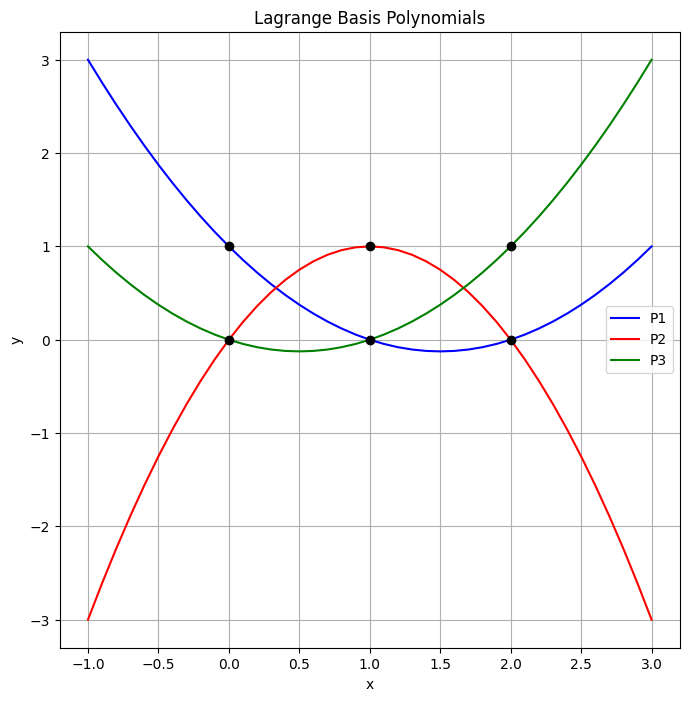

In [4]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

x = [0, 1, 2] ; y = [1, 3, 2]
P1_coeff = [1,-1.5,.5]  # 0.5(x^2 - 3x + 2) = [0.5, -3/2, 1]
P2_coeff = [0, 2,-1]    # -x^2 + 2x         = [-1, 2, 0]
P3_coeff = [0,-.5,.5]   # 0.5(x^2 - x)      = [0.5, -0.5, 0]

P1 = poly.Polynomial(P1_coeff)
P2 = poly.Polynomial(P2_coeff)
P3 = poly.Polynomial(P3_coeff)

x_new = np.arange(-1.0, 3.1, 0.1)
fig = plt.figure(figsize = (8,8))
plt.plot(x_new, P1(x_new), 'b', label = 'P1')
plt.plot(x_new, P2(x_new), 'r', label = 'P2')
plt.plot(x_new, P3(x_new), 'g', label = 'P3')

plt.plot(x, np.ones(len(x)), 'ko', x, np.zeros(len(x)), 'ko')
plt.title('Lagrange Basis Polynomials')
plt.xlabel('x'); plt.ylabel('y')
plt.grid(); plt.legend()
plt.show()

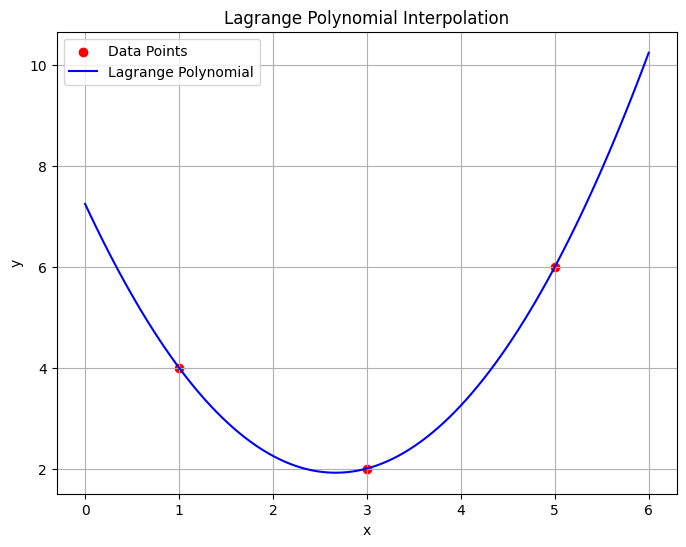

Verification of Lagrange Polynomial at data points:
L(1) = 4.0 (Expected: 4)
L(3) = 2.0 (Expected: 2)
L(5) = 6.0 (Expected: 6)


In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 3, 5])
y = np.array([4, 2, 6])

def lagrange_basis_polynomial(x, x_data, i):
    """
    Compute the i-th Lagrange basis polynomial for a given x.
    """
    n = len(x_data)
    basis_poly = 1.0
    for j in range(n):
        if j != i:
            basis_poly *= (x - x_data[j]) / (x_data[i] - x_data[j])
    return basis_poly

def lagrange_polynomial(x, x_data, y_data):
    """
    Compute the Lagrange polynomial for a given x.
    """
    n = len(x_data)
    lagrange_poly = 0.0
    for i in range(n):
        lagrange_poly += y_data[i] * lagrange_basis_polynomial(x, x_data, i)
    return lagrange_poly

x_values = np.linspace(0, 6, 100)
y_values = [lagrange_polynomial(x_val, x, y) for x_val in x_values]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', label='Data Points')
plt.plot(x_values, y_values, label='Lagrange Polynomial', color='blue')
plt.title('Lagrange Polynomial Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

print("Verification of Lagrange Polynomial at data points:")
for i in range(len(x)):
    print(f"L({x[i]}) = {lagrange_polynomial(x[i], x, y)} (Expected: {y[i]})")

Newton’s Polynomial Interpolation

Newton's Polynomial Interpolation is another method for constructing a polynomial that passes through given data points. Unlike Lagrange interpolation, Newton's approach allows for easier computation of coefficients and efficient updates when new data points are added—only the new coefficients need to be calculated.

A key feature of Newton's interpolation is that the coefficients
𝑎
𝑖
a
i
​
  can be efficiently determined using a divided differences table. This table simplifies the calculation and allows for incremental updates without affecting previously computed coefficients.

Like Lagrange interpolation, Newton's method ensures that for each data point
(
𝑥
𝑖
,
𝑦
𝑖
)
(x
i
​
 ,y
i
​
 ), the resulting function satisfies
𝑓
(
𝑥
𝑖
)
=
𝑦
𝑖
f(x
i
​
 )=y
i
​
 . However, Newton's approach is often preferred due to its computational efficiency and flexibility in handling additional data points.

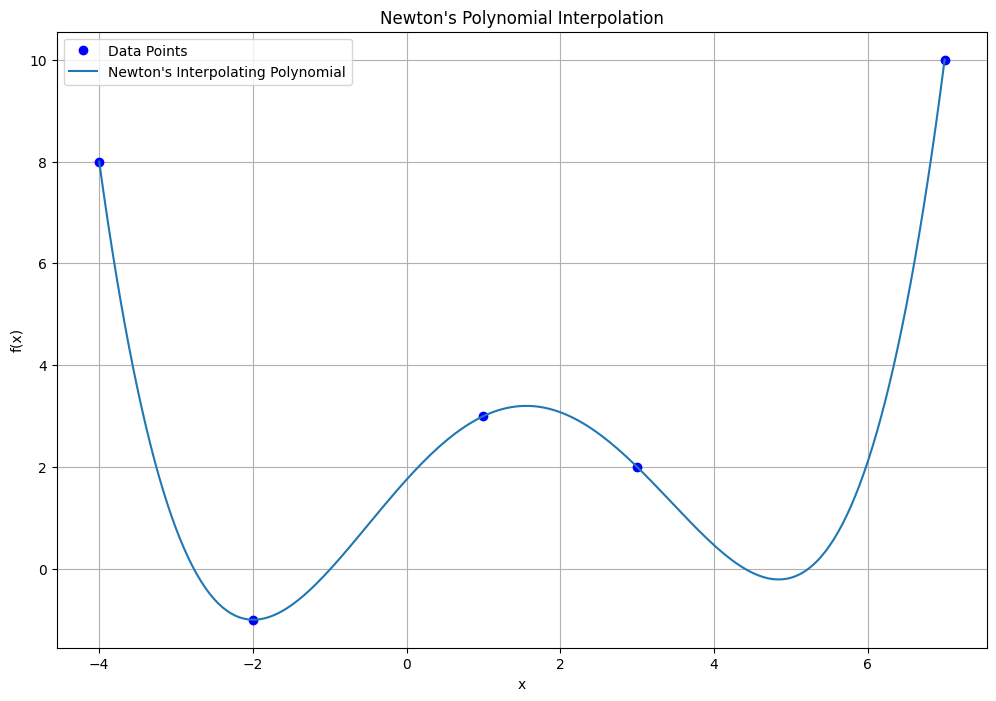

In [6]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def divided_diff(x, y):
    '''
    Function to calculate the divided differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            coef[i][j] = (coef[i + 1][j - 1] - coef[i][j - 1]) / (x[i + j] - x[i])
    return coef

def newton_poly(coef, x_data, x):
    '''
    Evaluate the Newton polynomial at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1, n + 1):
        p = coef[n - k] + (x - x_data[n - k]) * p
    return p

x = np.array([-4, -2, 1, 3, 7])
y = np.array([8, -1, 3, 2, 10])

a_s = divided_diff(x, y)[0, :]

x_new = np.linspace(-4, 7, 200)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize=(12, 8))
plt.plot(x, y, 'bo', label="Data Points")
plt.plot(x_new, y_new, label="Newton's Interpolating Polynomial")
plt.title("Newton's Polynomial Interpolation")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()
